In [1]:
# nEXO exp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import histlite
from tqdm.notebook import tqdm
import seaborn as sns
from tqdm import tqdm

import sys
sys.path.append('/p/lustre1/yu47/Sterile_Neutrino/sensitivity/')

from fitting import fitting


In [2]:
def parse_parameters(dm2, sin2,):
    label = r'$\Delta m^2=$' + f'{dm2:.5f}' + r' eV$^2, \sin^2(2\theta) = $' + f'{sin2:.5f}'
    return label

In [3]:

fit = fitting()

fit._set_fitting_filename("/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/MCalg_hist/3cmbin_smear0cm/fitting.txt")
fit.load_fitting_results()

path = '/p/lustre1/yu47/Sterile_Neutrino/sensitivity/data/'
fit._set_other_experimental_filenames([path+'reactor_global_allowed_region_0.csv', path+'reactor_global_allowed_region_1.csv', path+'reactor_global_allowed_region_2.csv',  path+'reactor_global_allowed_region_3.csv', path + 'LZ_natural_LXe_shapeonly.csv', ])

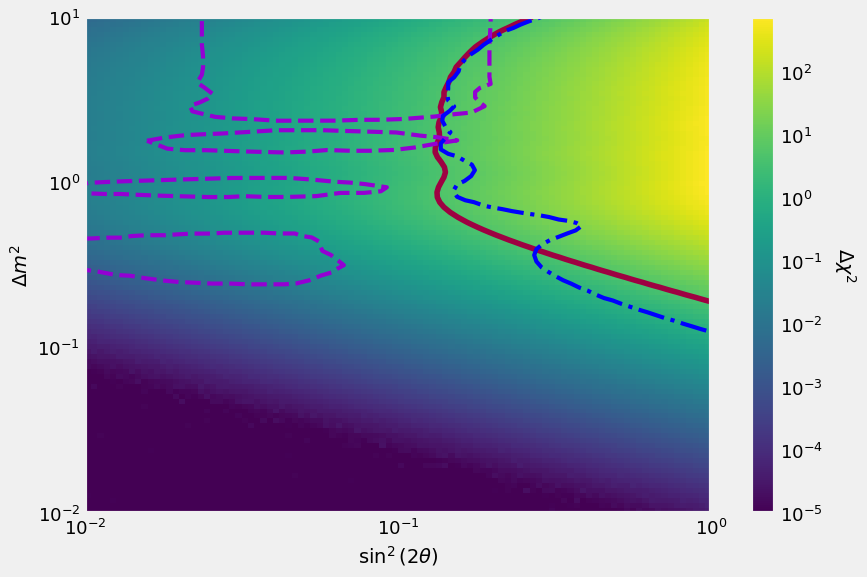

In [4]:
fit.draw_fitting_results('chi_square', contour=True, others=True);

## Two-dimensional fitting contour

In [7]:
dmsquare = np.logspace(-2, 1, 100)
sinsquare = np.logspace(-2, 0, 100)


fits = np.loadtxt('/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/MCalg_hist/3cmbin_smear0cm/fitting.txt')
alpha1_0 = fits[:, 0]
alpha1_0 = np.reshape(alpha1_0, (100, 100))
alpha2_0 = fits[:, 1]
alpha2_0 = np.reshape(alpha2_0, (100, 100))
alpha3_0 = fits[:, 2]
alpha3_0 = np.reshape(alpha3_0, (100, 100))
dchi2_0 = fits[:, 3]
dchi2_0 = np.reshape(dchi2_0, (100, 100))
total_rate_scale0 = 1 + alpha1_0 + alpha2_0 + alpha3_0

fits = np.loadtxt('/p/lustre1/yu47/Sterile_Neutrino/jobs/Fits/MCalg_hist/3cmbin_smear1cm/fitting.txt')
alpha1_1 = fits[:, 0]
alpha1_1 = np.reshape(alpha1_1, (100, 100))
alpha2_1 = fits[:, 1]
alpha2_1 = np.reshape(alpha2_1, (100, 100))
alpha3_1 = fits[:, 2]
alpha3_1 = np.reshape(alpha3_1, (100, 100))
dchi2_1 = fits[:, 3]
dchi2_1 = np.reshape(dchi2_1, (100, 100))
total_rate_scale1 = 1 + alpha1_1 + alpha2_1 + alpha3_1

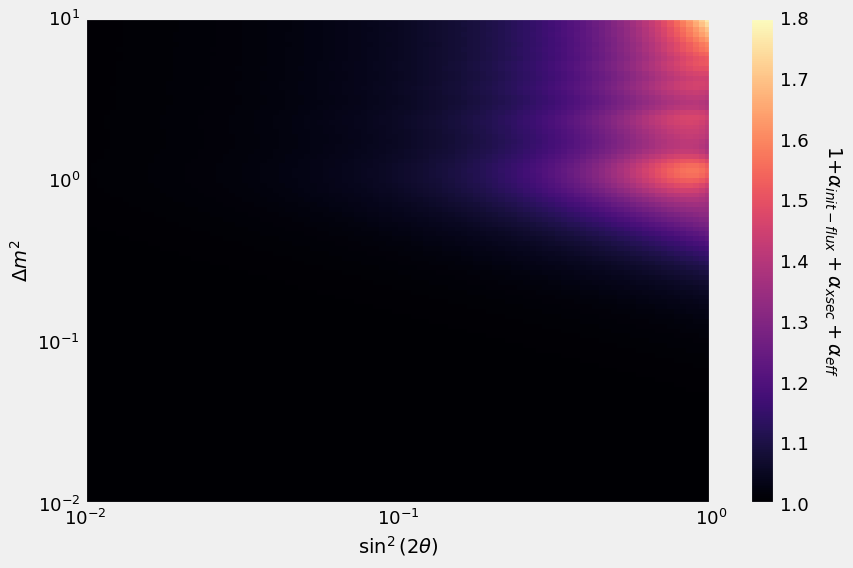

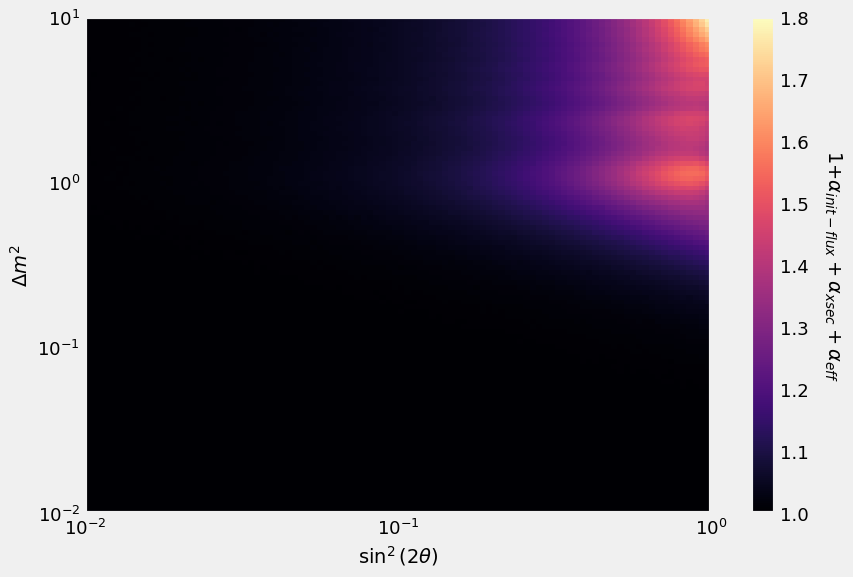

In [17]:
import matplotlib.colors as colors


dm2_edges = np.logspace(-2, 1, 101)
sin2_edges = np.logspace(-2, 0, 101)

dm2_cents = np.logspace(-2, 1, 100)
sin2_cents = np.logspace(-2, 0, 100)

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, total_rate_scale0, shading='flat', cmap='magma', vmin=1, vmax=1.8)
#im = ax.pcolormesh(sin2_edges, dm2_edges, alpha1, shading='flat', )
ax.loglog()
cb = plt.colorbar(im, ax=ax,)
cb.set_label(r'1+$\alpha_{init-flux}+\alpha_{xsec}+\alpha_{eff}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)
#fig.savefig("../plots/dchi2_MCalg_noSmear_3cmBinWidth_90CL_14cmSource.png")

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, total_rate_scale1, shading='flat', cmap='magma', vmin=1, vmax=1.8)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)
cb.set_label(r'1+$\alpha_{init-flux}+\alpha_{xsec}+\alpha_{eff}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)

#fig.savefig("../plots/dchi2_MCalg_1cmSmear_3cmBinWidth_14cmSource.png")

plt.tight_layout()

(67, 97)


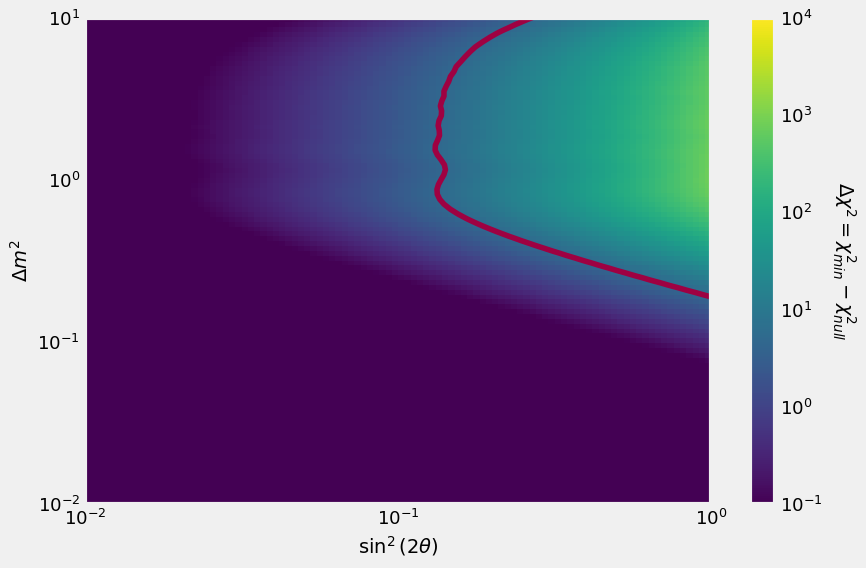

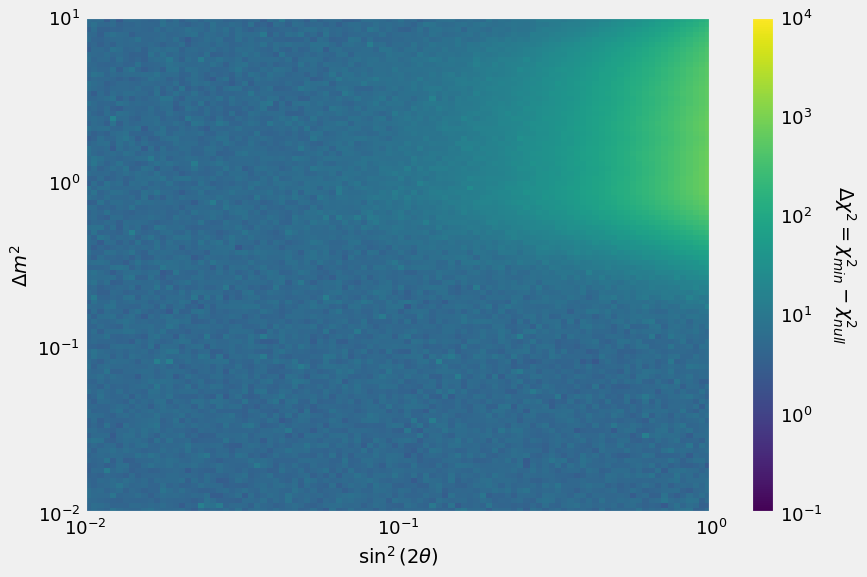

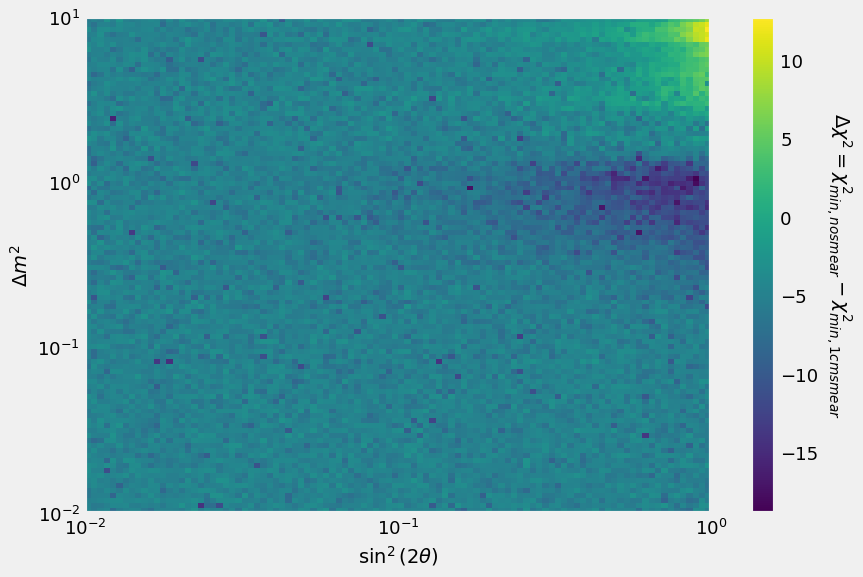

In [41]:
import matplotlib.colors as colors


dm2_edges = np.logspace(-2, 1, 101)
sin2_edges = np.logspace(-2, 0, 101)

dm2_cents = np.logspace(-2, 1, 100)
sin2_cents = np.logspace(-2, 0, 100)

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, dchi2_0, shading='flat', cmap='viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4))
#im = ax.pcolormesh(sin2_edges, dm2_edges, alpha1, shading='flat', )
X, Y = np.meshgrid(sin2_cents, dm2_cents)
CS = ax.contour(X, Y, dchi2_0, levels=[4.605], cmap='Spectral')
#ax.clabel(CS, inline=True, fontsize=16)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)

cb.set_label(r'$\Delta\chi^2 = \chi^2_{min} - \chi^2_{null}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)
#fig.savefig("../plots/dchi2_MCalg_noSmear_3cmBinWidth_90CL_14cmSource.png")

fig, ax = plt.subplots(figsize=(9, 6))
im = ax.pcolormesh(sin2_edges, dm2_edges, dchi2_1, shading='flat', cmap='viridis', norm=colors.LogNorm(vmin=1e-1, vmax=1e4))
#im = ax.pcolormesh(sin2_edges, dm2_edges, alpha1, shading='flat', )
X, Y = np.meshgrid(sin2_cents, dm2_cents)
#CS = ax.contour(X, Y, dchi2_1, levels=[4.605], cmap='Spectral')
#ax.clabel(CS, inline=True, fontsize=16)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)

cb.set_label(r'$\Delta\chi^2 = \chi^2_{min} - \chi^2_{null}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)

#fig.savefig("../plots/dchi2_MCalg_1cmSmear_3cmBinWidth_14cmSource.png")

plt.tight_layout()


fig, ax = plt.subplots(figsize=(9, 6))
delta_chi2 = dchi2_0 - dchi2_1

flat_minid = np.argmin(delta_chi2)
min_indices = np.unravel_index(flat_minid, delta_chi2.shape)
print(min_indices)

im = ax.pcolormesh(sin2_edges, dm2_edges, delta_chi2, shading='flat', cmap='viridis', )
#im = ax.pcolormesh(sin2_edges, dm2_edges, alpha1, shading='flat', )
X, Y = np.meshgrid(sin2_cents, dm2_cents)
#CS = ax.contour(X, Y, dchi2_1, levels=[4.605], cmap='Spectral')
#ax.clabel(CS, inline=True, fontsize=16)
ax.loglog()
cb = plt.colorbar(im, ax=ax,)

cb.set_label(r'$\Delta\chi^2 = \chi^2_{min, no smear} - \chi^2_{min, 1cm smear}$', fontsize=14, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=13)
 
ax.set_xlabel(r'$\sin^2(2\theta)$', fontsize=14)
ax.set_ylabel(r'$\Delta m^2$', fontsize=14)
ax.tick_params(labelsize=13)

#fig.savefig("../plots/dchi2_MCalg_1cmSmear_3cmBinWidth_14cmSource.png")

plt.tight_layout()

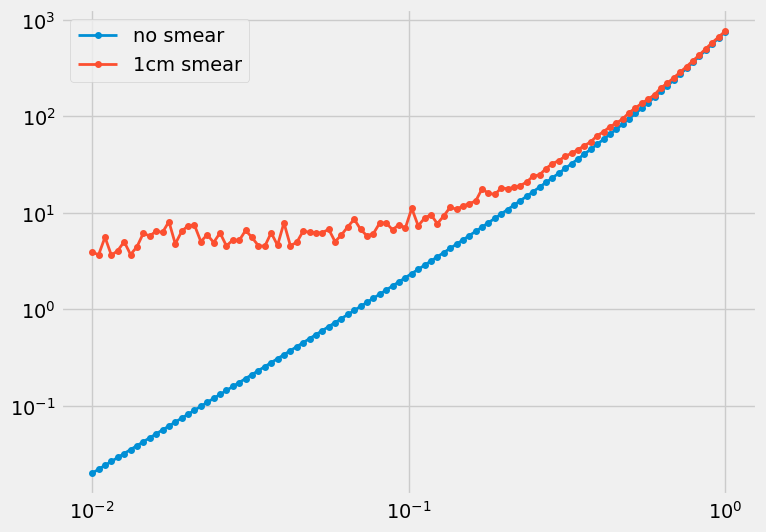

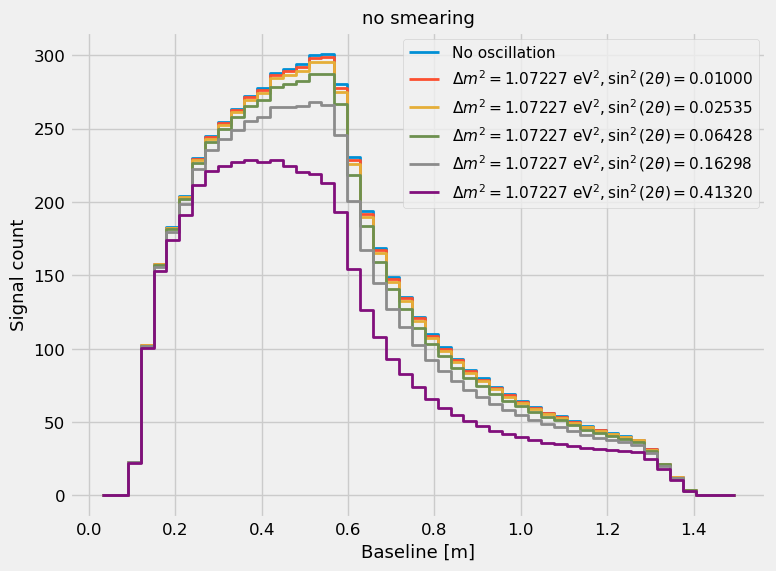

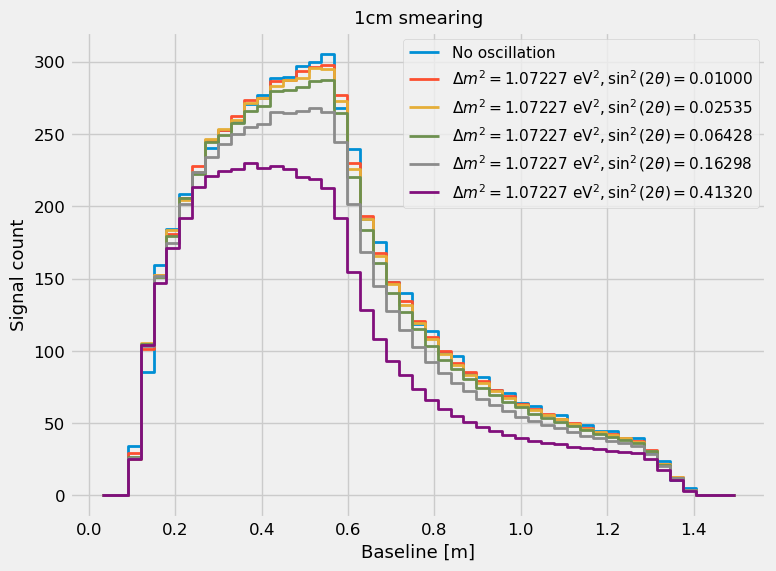

In [8]:
# Check PDFs

import pickle

row = 67
dm2_arr, sin2_arr = np.logspace(-2, 1, 100), np.logspace(-2, 0, 100)
dm2 = dm2_arr[row]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.logspace(-2, 0, 100), dchi2_0[row, :], 'o-', ms=4, lw=2, label='no smear')
ax.plot(np.logspace(-2, 0, 100), dchi2_1[row, :], 'o-', ms=4, lw=2, label='1cm smear')
ax.semilogx()
ax.legend()
ax.semilogy()


hists0, hists1 = [], []
h0_noOsc, h1_noOsc = 0, 0
file0 = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.00m.p'
with open(file0, 'rb') as f:
    h0_noOsc = pickle.load(f)
file1 = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p'
with open(file1, 'rb') as f:
    h1_noOsc = pickle.load(f)

for sin2 in np.logspace(-2, 0, 100):
    file0 = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare{dm2:.5f}eV2/MC_dmsquare{dm2:.5f}sinsquare{sin2:.5f}_source14cm_smear0.00m.p'
    with open(file0, 'rb') as f:
        h0 = pickle.load(f)
    hists0.append(h0)

    file1 = f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare{dm2:.5f}eV2/MC_dmsquare{dm2:.5f}sinsquare{sin2:.5f}_source14cm_smear0.01m.p'
    with open(file1, 'rb') as f:
        h1 = pickle.load(f)
    hists1.append(h1)


fig, ax = plt.subplots(figsize=(8,6))
histlite.plot1d(ax, h0_noOsc, lw=2, label="No oscillation")
for i in range(0, len(hists0), 20):
    h0 = hists0[i]
    histlite.plot1d(ax, h0, lw=2, label=parse_parameters(dm2, sin2_arr[i]))
ax.legend(fontsize=11)
ax.set_title("no smearing", fontsize=13)
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Signal count', fontsize=13)
ax.tick_params(labelsize=12)


fig, ax = plt.subplots(figsize=(8,6))
histlite.plot1d(ax, h1_noOsc, lw=2, label="No oscillation")
for i in range(0, len(hists1), 20):
    h1 = hists1[i]
    histlite.plot1d(ax, h1, lw=2, label=parse_parameters(dm2, sin2_arr[i]))
ax.legend(fontsize=11)
ax.set_title("1cm smearing", fontsize=13)
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Signal count', fontsize=13)
ax.tick_params(labelsize=12)

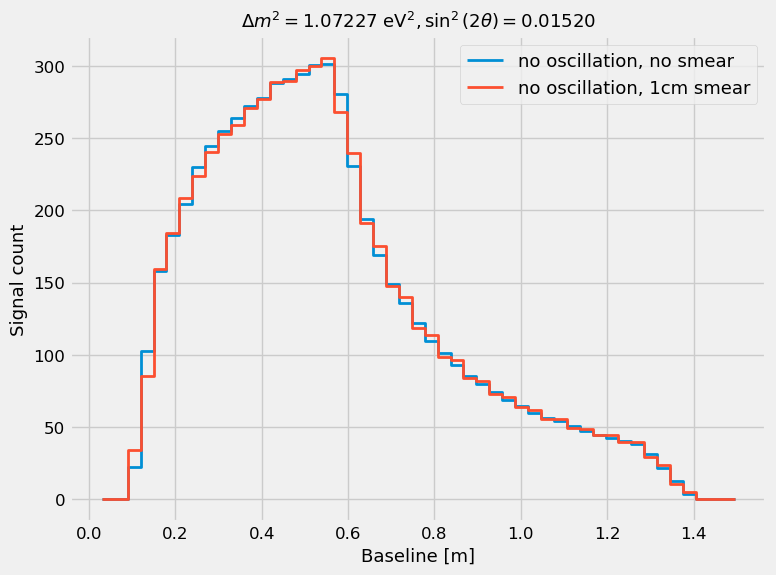

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))
id = 9
#histlite.plot1d(ax, hists0[id], lw=2, label='no Smear')
#histlite.plot1d(ax, hists1[id], lw=2, label="1cm Smear")
histlite.plot1d(ax, h0_noOsc, lw=2, label='no oscillation, no smear')
histlite.plot1d(ax, h1_noOsc, lw=2, label='no oscillation, 1cm smear')
ax.legend(fontsize=13)
ax.set_title(parse_parameters(dm2, sin2_arr[id]), fontsize=13)
ax.set_xlabel('Baseline [m]', fontsize=13)
ax.set_ylabel('Signal count', fontsize=13)
ax.tick_params(labelsize=12)

In [44]:
row, col = 67, 97
dm2 = dm2_arr[row]
sin2 = sin2_arr[col]
print(dm2, sin2)

fit0 = fitting()
fit0._set_dataset_asimov_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.00m.p')
#fit0._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.00m.p')
fit0._set_PDF_filename(f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare{dm2:.5f}eV2/MC_dmsquare{dm2:.5f}sinsquare{sin2:.5f}_source14cm_smear0.00m.p')
fit0.reload()

fit1 = fitting()
fit1._set_dataset_asimov_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p')
#fit1._set_PDF_filename('/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/MC_dmsquare0.00000sinsquare0.00000_source14cm_smear0.01m.p')
fit1._set_PDF_filename(f'/p/lustre1/yu47/Sterile_Neutrino/jobs/MC/dmsquare{dm2:.5f}eV2/MC_dmsquare{dm2:.5f}sinsquare{sin2:.5f}_source14cm_smear0.01m.p')
fit1.reload()

1.072267222010323 0.9111627561154896


In [45]:
val0, err0, m0 = fit0.minimize_chi_square()
val1, err1, m1 = fit1.minimize_chi_square()

In [46]:
fit0.print_fitting()
fit1.print_fitting()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 560.1                      │              Nfcn = 63               │
│ EDM = 3.21e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬─────────────────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────

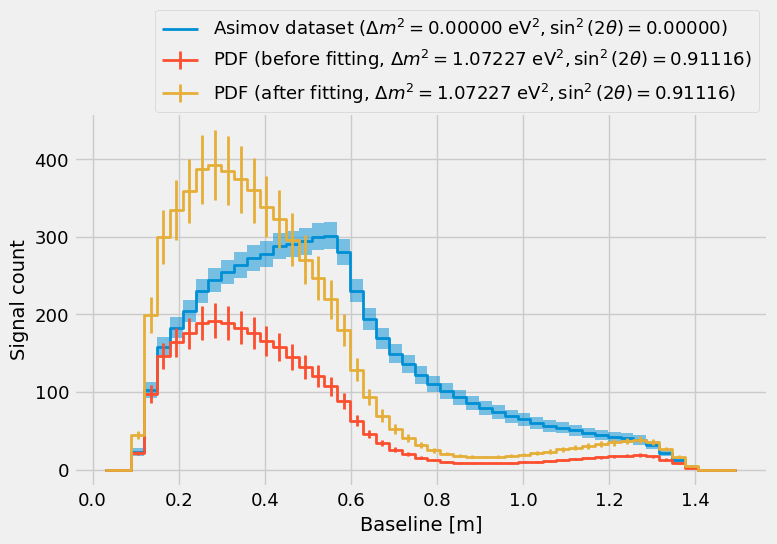

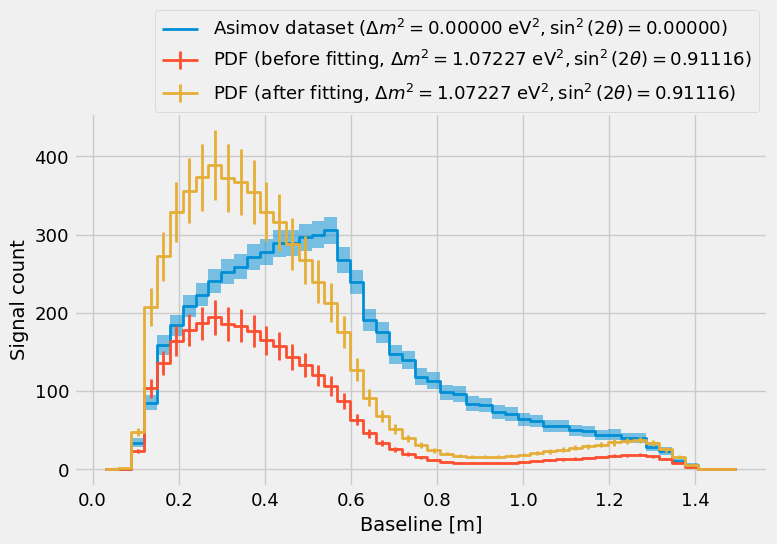

In [47]:
fit0.draw_histograms(pdf=True, pdf_fitted=True);
fit1.draw_histograms(pdf=True, pdf_fitted=True);

In [50]:
print('No smearing: ')
print(fit0.alpha_init_flux, fit0.alpha_xsec, fit0.alpha_det_eff, fit0.total_rate_scaling(), fit0.minimizer.fval)
print('1cm smearing: ')
print(fit1.alpha_init_flux, fit1.alpha_xsec, fit1.alpha_det_eff, fit1.total_rate_scaling(), fit1.minimizer.fval)

No smearing: 
0.016562447889190098 0.5030451386361815 0.03732335189890427 1.5569309384242758 560.1247778031542
1cm smearing: 
0.015888569606790155 0.482131148014734 0.03578204211791643 1.5338017597394407 578.9789930090545
